# Decision Tree Demo

This notebook demonstrates how to build, visualize, and analyze decision trees for classification.

**What you'll learn:**
- Build decision trees from data
- Visualize tree structure
- Understand feature importance
- Evaluate tree performance
- Control tree complexity

## Setup

In [1]:
import itm4150
from sklearn.model_selection import train_test_split

# Load data
df = itm4150.load_mushroom_data()
train_df, test_df = train_test_split(df, test_size=0.3)
print(train_df['gill-color'].value_counts())
print(test_df.head())

gill-color
b    1249
p    1033
w     852
n     710
h     509
g     506
u     332
k     300
e      74
y      57
o      46
r      18
Name: count, dtype: int64
     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
3539     p         x           f         g       f    f               f   
5120     p         f           s         b       t    f               f   
4853     p         x           y         y       f    f               f   
5138     p         f           y         y       f    f               f   
640      e         b           y         y       t    l               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
3539            c         b          g  ...                        k   
5120            c         b          w  ...                        f   
4853            c         b          h  ...                        k   
5138            c         b          p  ...                        k   
640             c         b     

## Step 1: Build Your First Decision Tree

Let's start with a simple tree with limited depth.

In [2]:
# Build a shallow tree (depth = 2)
tree = itm4150.build_tree(train_df, target='class', max_depth=2)

Numeric features: []
Categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


## Step 2: Visualize the Tree

Each node shows:
- The splitting rule (e.g., "odor <= 0.5")
- Number of samples in that node
- Class distribution
- Predicted class (color coded)

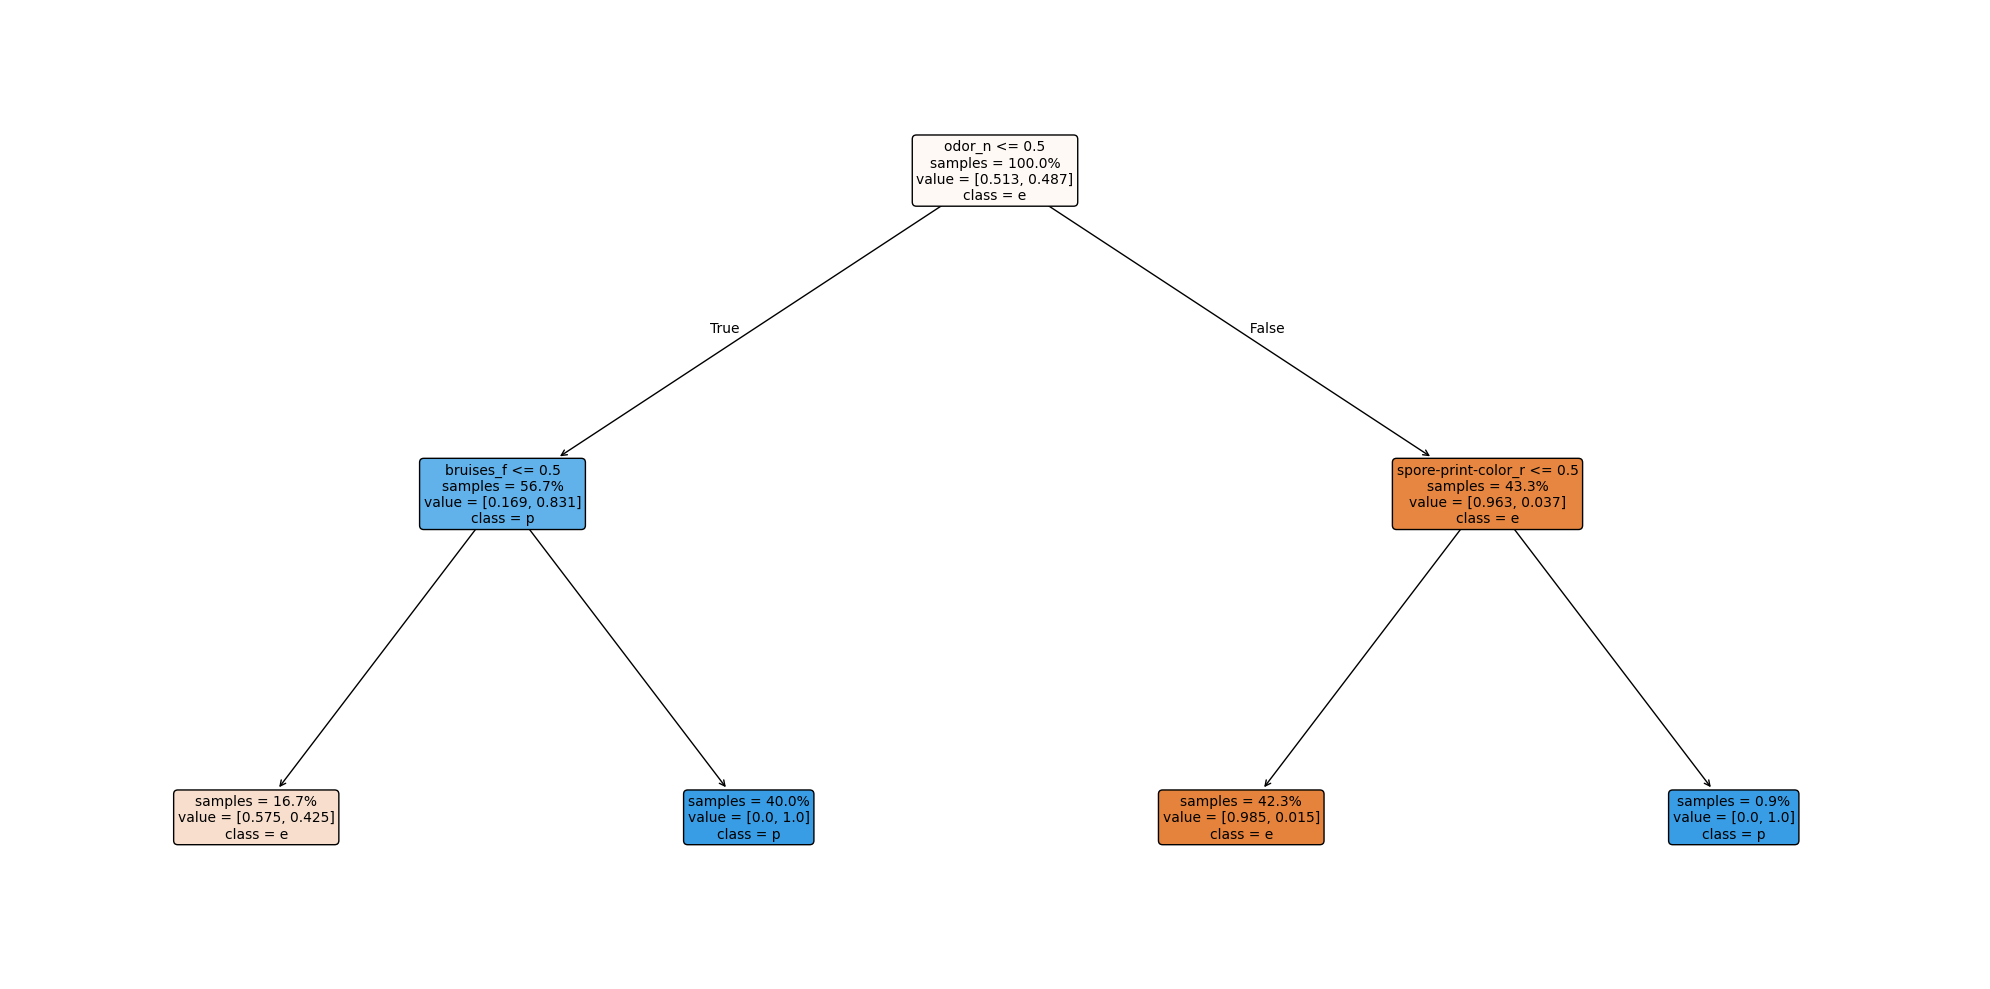

In [9]:
itm4150.visualize_tree(tree, show_probabilities=True)

## Step 3: Check Accuracy

How well does our tree classify the mushrooms?

In [10]:
accuracy = tree.score(test_df)
print(f"Accuracy: {accuracy:.2%}")
print(f"\nThis means {accuracy*100:.1f}% of mushrooms are correctly classified")

Accuracy: 93.81%

This means 93.8% of mushrooms are correctly classified


## Step 4: View Decision Rules

Let's see the actual rules the tree uses to make decisions.


In [11]:
rules = itm4150.get_tree_rules(tree)
print("Decision Rules:")
print("=" * 60)
print(rules)


Decision Rules:
|--- odor_n <= 0.50
|   |--- bruises_f <= 0.50
|   |   |--- class: 0
|   |--- bruises_f >  0.50
|   |   |--- class: 1
|--- odor_n >  0.50
|   |--- spore-print-color_r <= 0.50
|   |   |--- class: 0
|   |--- spore-print-color_r >  0.50
|   |   |--- class: 1



## Step 5: Feature Importance

Which features did the tree find most useful?

In [12]:
importance = itm4150.get_feature_importance(tree)
print("Feature Importance Ranking:")
print("=" * 60)
print(importance.to_string(index=False))

Feature Importance Ranking:
                   feature  importance
                    odor_n    0.673024
                 bruises_f    0.264114
       spore-print-color_r    0.062862
               cap-shape_b    0.000000
  stalk-color-below-ring_g    0.000000
              veil-color_y    0.000000
              veil-color_w    0.000000
              veil-color_o    0.000000
              veil-color_n    0.000000
               veil-type_p    0.000000
  stalk-color-below-ring_y    0.000000
  stalk-color-below-ring_w    0.000000
  stalk-color-below-ring_p    0.000000
  stalk-color-below-ring_o    0.000000
  stalk-color-below-ring_n    0.000000
  stalk-color-below-ring_e    0.000000
             ring-number_o    0.000000
  stalk-color-below-ring_c    0.000000
  stalk-color-below-ring_b    0.000000
  stalk-color-above-ring_y    0.000000
  stalk-color-above-ring_w    0.000000
  stalk-color-above-ring_p    0.000000
  stalk-color-above-ring_o    0.000000
  stalk-color-above-ring_n    0.0000

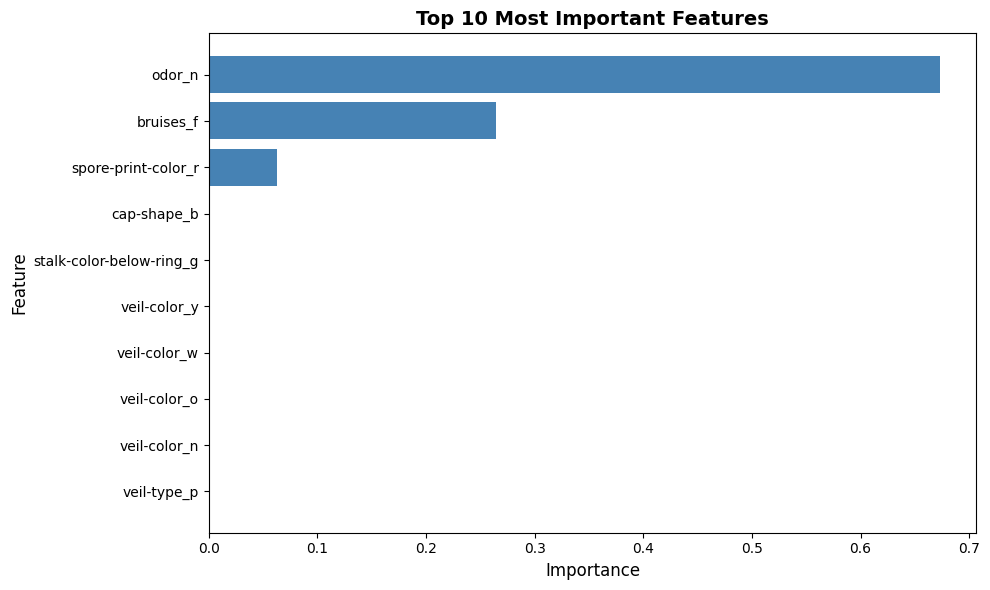

In [13]:
# Visualize feature importance
import matplotlib.pyplot as plt

top_features = importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Plotting decision regions for: odor vs bruises


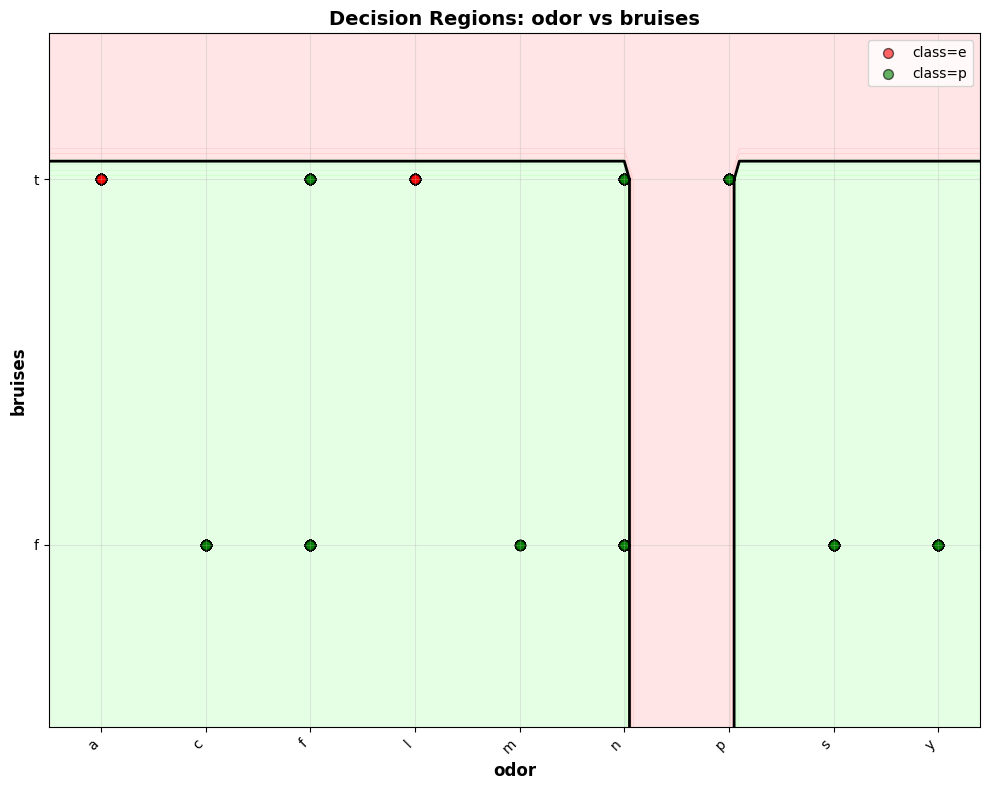

In [14]:
tree.plot_decision_regions(feature1='odor', feature2='bruises')